In [151]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import missingno

In [152]:
df_play_store  = pd.read_csv("googleplaystore.csv")

In [154]:
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [155]:
df_play_store.shape

(10841, 13)

In [156]:
"""
App - Application name
Category - Application category
Rating - Application rating based on reviews
Reviews - Reviewers count
Size - Size of application
Installs - Installs count of application
Type - Type of application (Free or Paid)
Price - Price of application
Content Rating - Age rating of application
Genres - Genres of application
Last updated - The date of last updated
Current ver - Current version of application
Android Ver - Version of supported androids
"""

'\nApp - Application name\nCategory - Application category\nRating - Application rating based on reviews\nReviews - Reviewers count\nSize - Size of application\nInstalls - Installs count of application\nType - Type of application (Free or Paid)\nPrice - Price of application\nContent Rating - Age rating of application\nGenres - Genres of application\nLast updated - The date of last updated\nCurrent ver - Current version of application\nAndroid Ver - Version of supported androids\n'

In [157]:
df_play_store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [158]:
# check price column values to update type
df_play_store["Price"].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [159]:
# "Everyone" is not valid price, getting that rows
incorrect_row = df_play_store[df_play_store["Price"] == 'Everyone']
incorrect_row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [160]:
# The data is that row is not correct, so removing it
df_play_store = df_play_store.drop(incorrect_row.index)

In [161]:
mask = (df_play_store['Price'] != '0') & df_play_store['Price'].str.startswith('$')
mask.all()

False

In [162]:
# find if all other values start with $ symbol
df_play_store[~df_play_store['Price'].str.startswith('$')]["Price"].unique()

array(['0'], dtype=object)

In [163]:
# removing $ symbol to change column type to numeric
df_play_store['Price'] = df_play_store['Price'].str.replace('$', '')
df_play_store['Price'] = df_play_store['Price'].astype(float)
df_play_store = df_play_store.rename(columns={'Price': 'Price, $'})

<ipython-input-163-152c19ac3749>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_play_store['Price'] = df_play_store['Price'].str.replace('$', '')


In [164]:
df_play_store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price, $          float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [165]:
#check if all sizes are in M
df_play_store['Size'].str[-1].unique()

array(['M', 'e', 'k'], dtype=object)

In [166]:
# "e" is not valid measurement, getting that rows
incorrect_row = df_play_store[df_play_store["Size"].str[-1] == 'e']
incorrect_row

,App,Category,Rating,Reviews,Size,Installs,Type,"Price, $",Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0.0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0.0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0.0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0.0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [167]:
# so there are applications with not defined sizes
# one choose is to replace them with "NaN" to update column in numeric type (can be done by deviding the ones which ends with "k" in 1024,
# so all values will be in Mbs, and by the same steps as for "Price" column, will update this column into numeric)
# but as about 1/5 of the column data will be "NaN" in that case, I will not move foreward with that solution, and will elave this column as it is

In [168]:
df_play_store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price, $             0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [169]:
incorrect_row = df_play_store[df_play_store["Type"].isnull()]

In [170]:
df_play_store['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [171]:
# The data in this row is not full and mixed, so I will remove it
df_play_store = df_play_store.drop(incorrect_row.index)

In [172]:
# 1474 nulls in Rating column are too much to remove, so I will not drop them
# I'm not sure if I will work with last 2 columns, so will not drop their nulls as well

In [173]:
# getting duplicated rows
duplicate_rows_all_columns = df_play_store[df_play_store.duplicated(subset=None, keep="first")]
duplicate_rows_all_columns

,App,Category,Rating,Reviews,Size,Installs,Type,"Price, $",Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0.0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0.0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0.0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [174]:
# ensure in one example that the rows are duplicated
duplicated_row = df_play_store[df_play_store["App"] == 'Ebook Reader']
duplicated_row

,App,Category,Rating,Reviews,Size,Installs,Type,"Price, $",Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0.0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
4095,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0.0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up


In [175]:
# remove duplications
df_play_store = df_play_store.drop(duplicate_rows_all_columns.index)

In [176]:
df_play_store.shape

(10356, 13)

In [177]:
# resetting indexes
df_play_store = df_play_store.reset_index(drop=True)
df_play_store

,App,Category,Rating,Reviews,Size,Installs,Type,"Price, $",Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10352,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10353,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10354,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


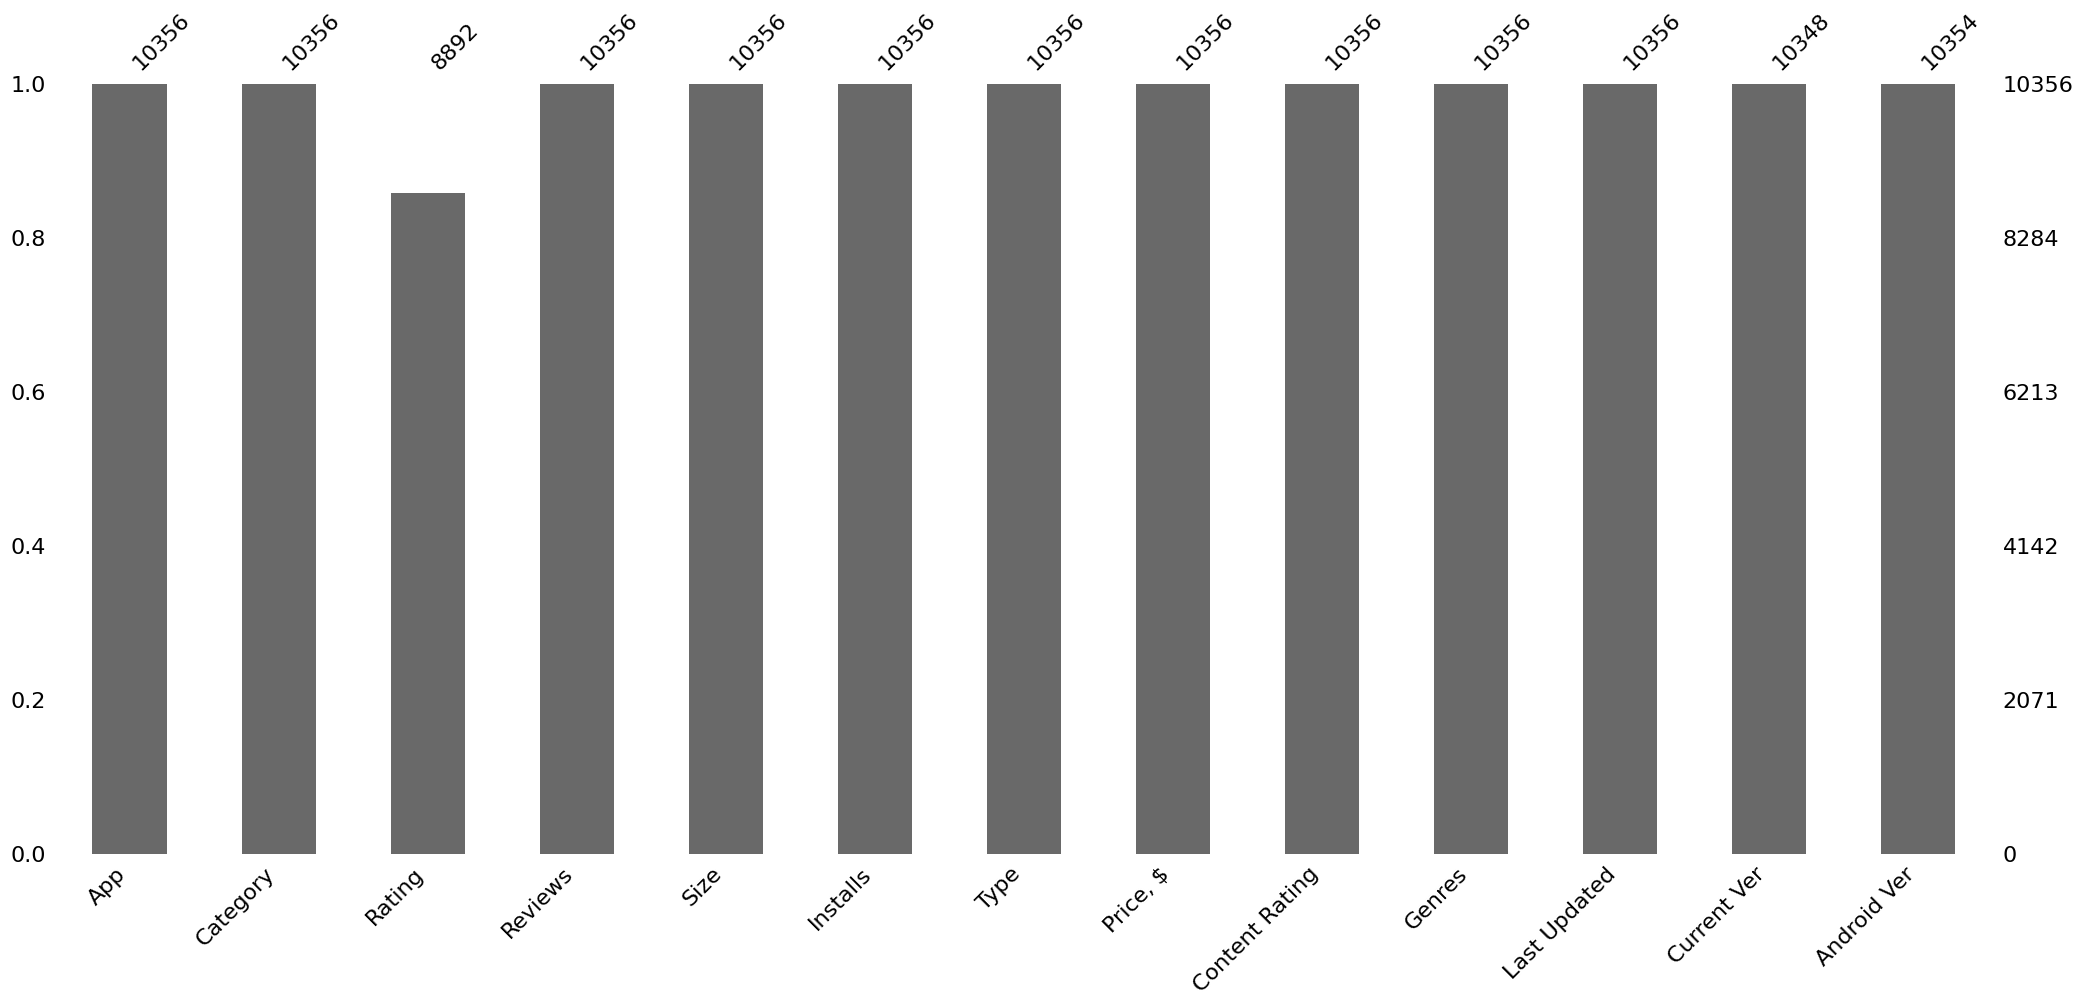

In [178]:
missingno.bar(df_play_store)
plt.show()

<Axes: >

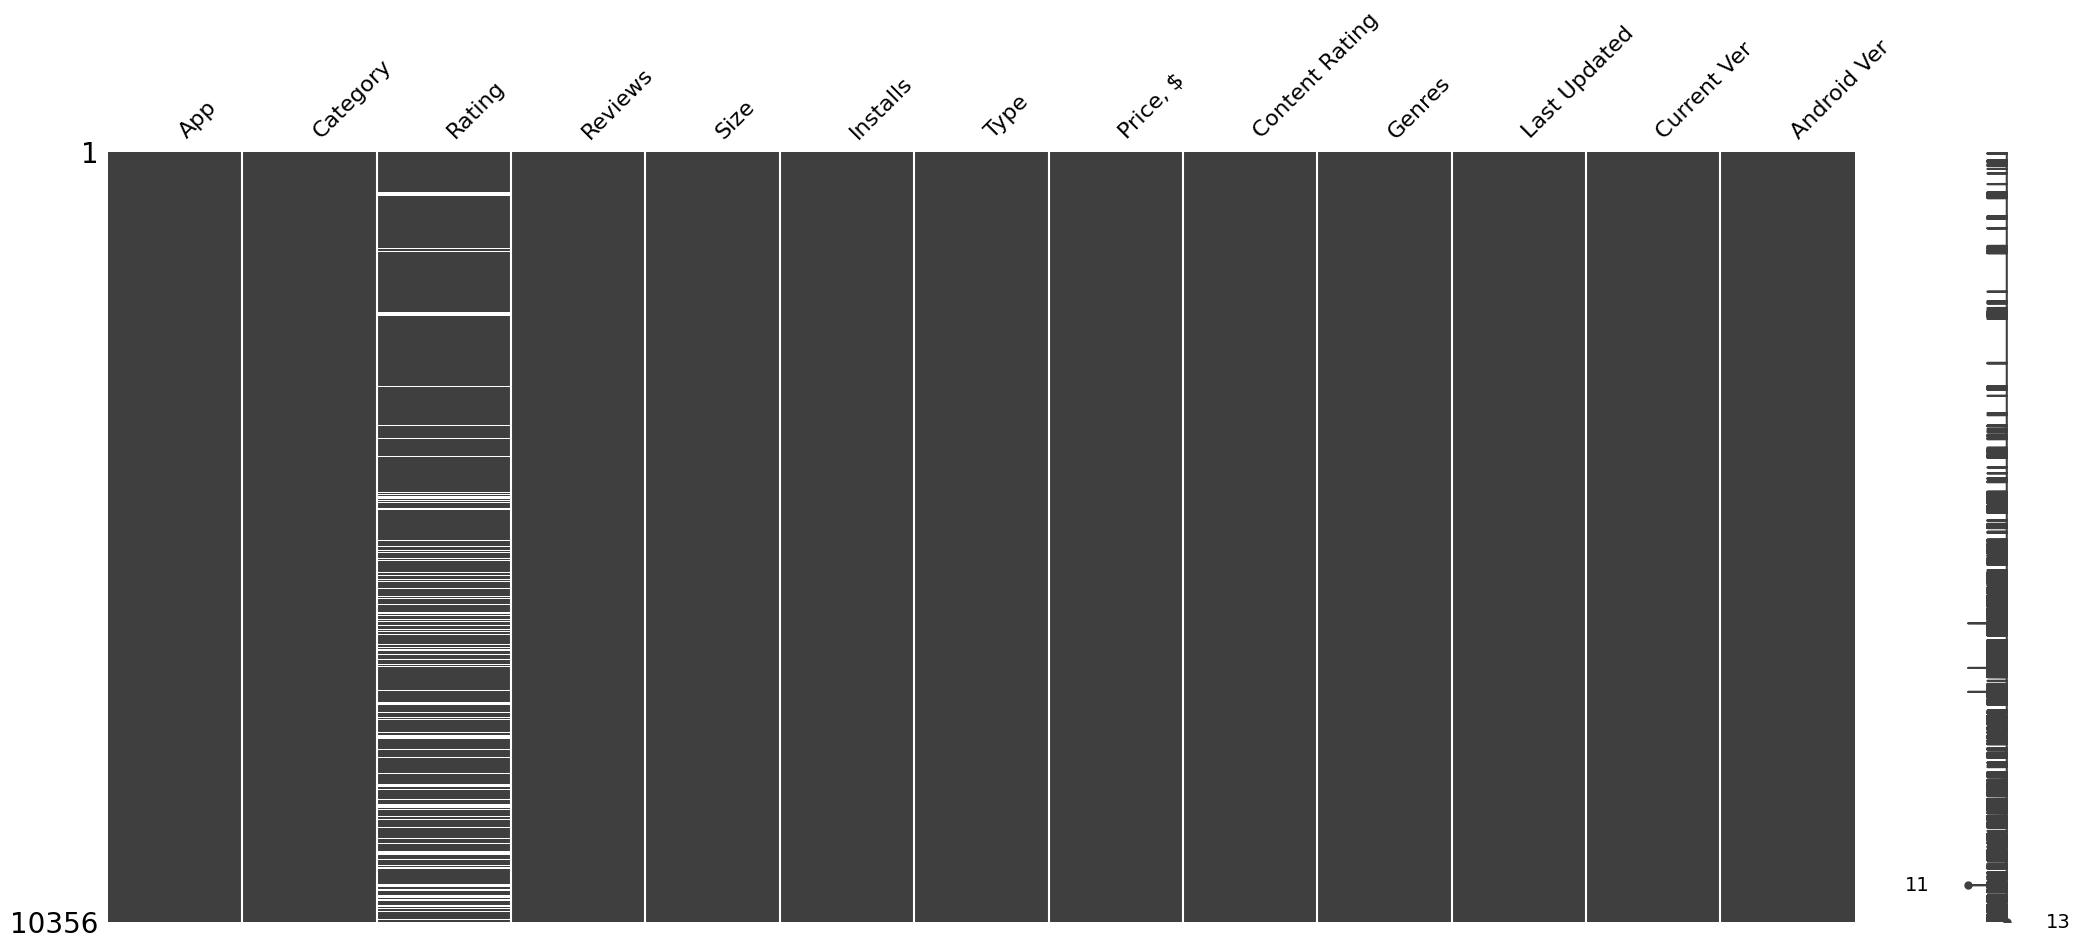

In [179]:
missingno.matrix(df_play_store)

In [180]:
# change reviews to numeric type
df_play_store["Reviews"] = df_play_store["Reviews"].astype(int)
df_play_store.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price, $          float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [181]:
num_cols = df_play_store.dtypes[df_play_store.dtypes!="O"].index.tolist()

In [182]:
df_play_store[num_cols]

,Rating,Reviews,"Price, $"
0,4.1,159,0.0
1,3.9,967,0.0
2,4.7,87510,0.0
3,4.5,215644,0.0
4,4.3,967,0.0
...,...,...,...
10351,4.5,38,0.0
10352,5.0,4,0.0
10353,NaN,3,0.0
10354,4.5,114,0.0


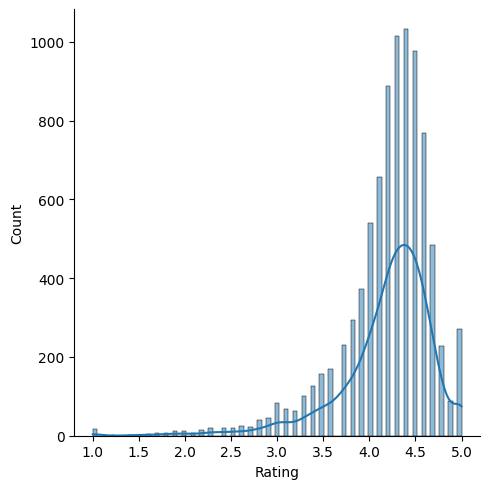

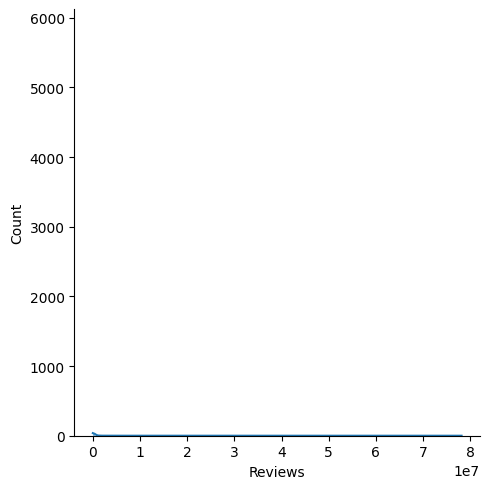

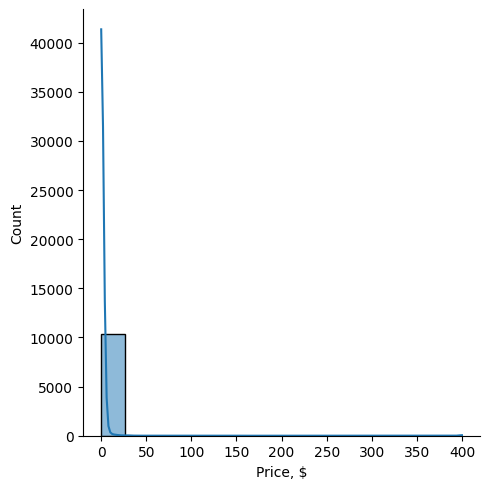

In [183]:
for num_col in num_cols:
    sns.displot(df_play_store[num_col], kde=True)
    plt.show()

In [184]:
df_sorted = df_play_store.sort_values("Rating", ascending=False)

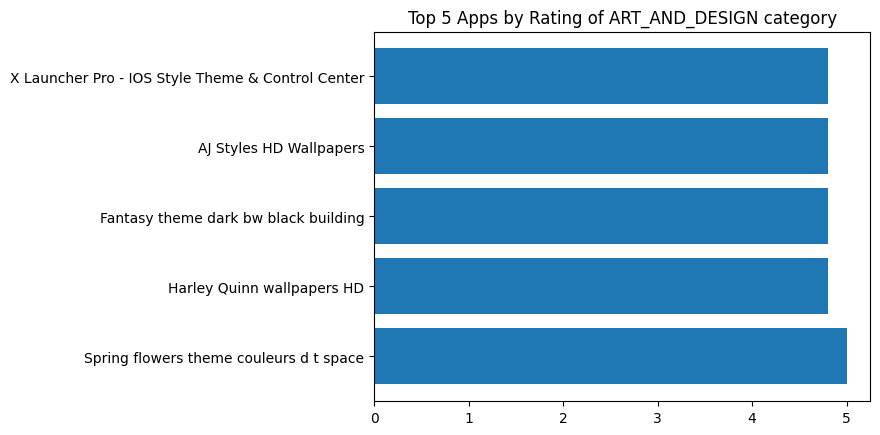

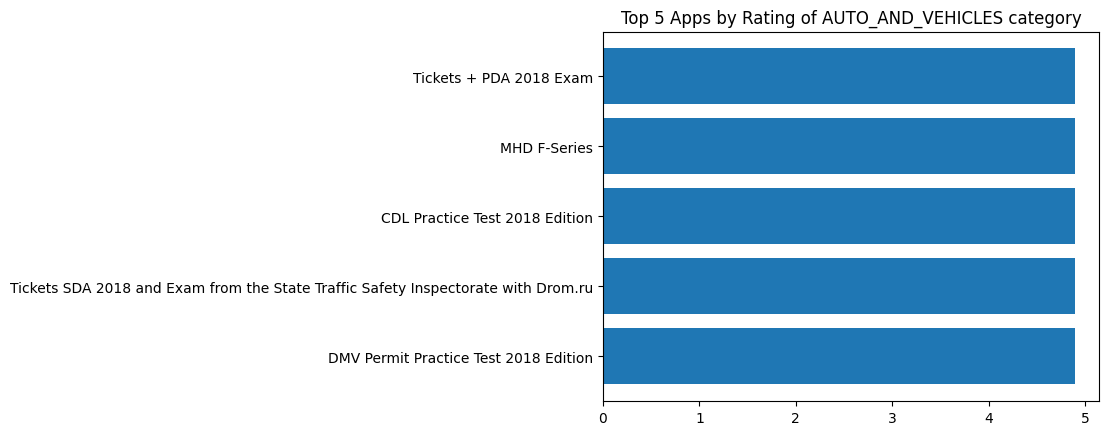

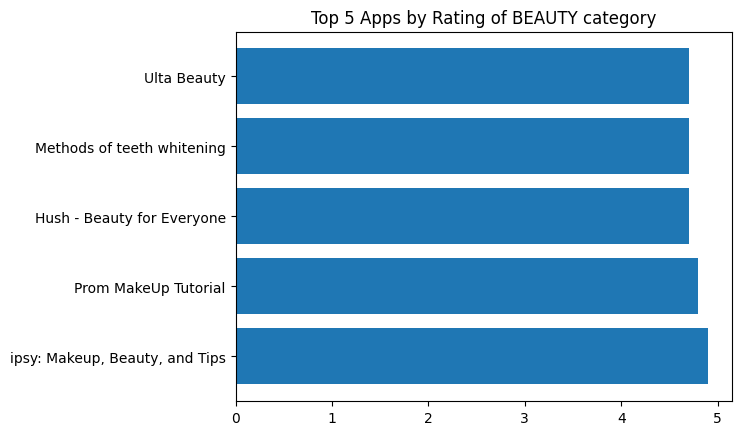

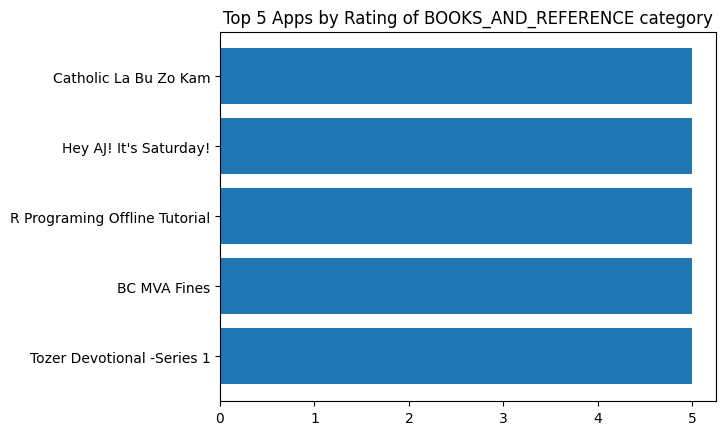

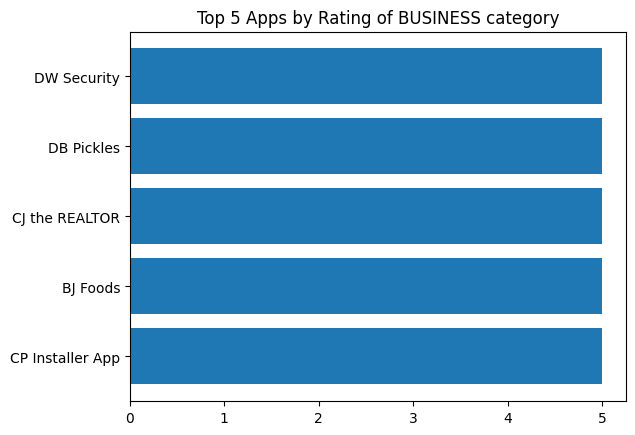

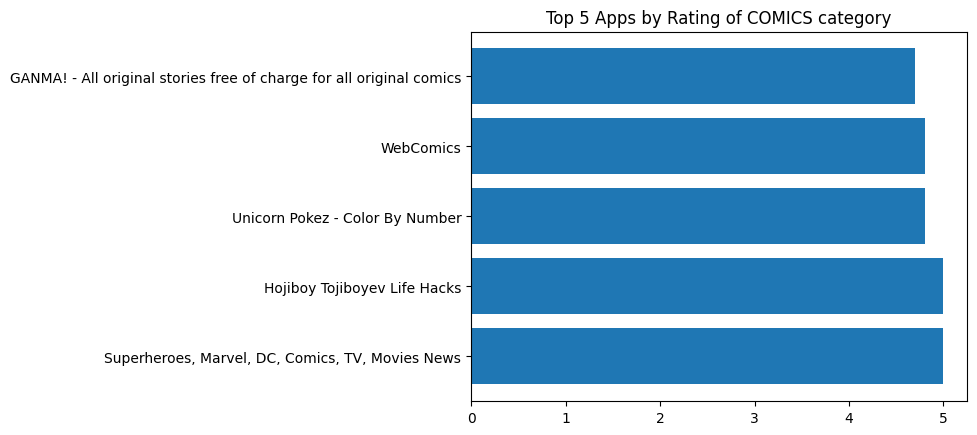

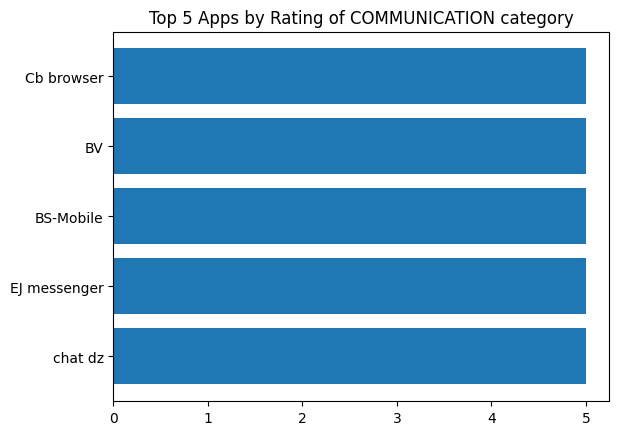

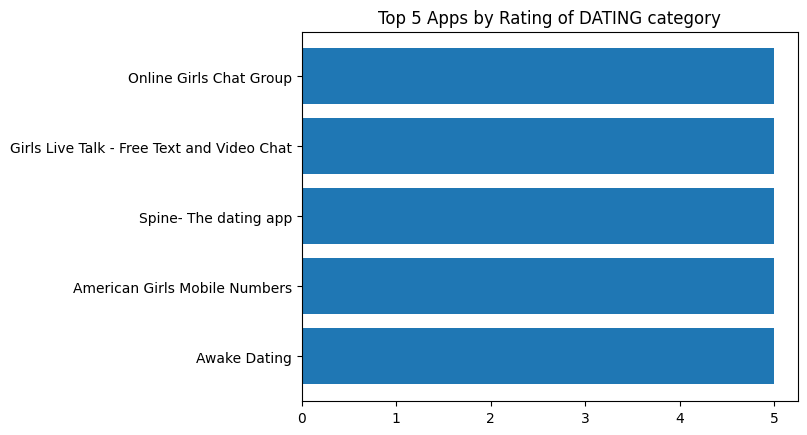

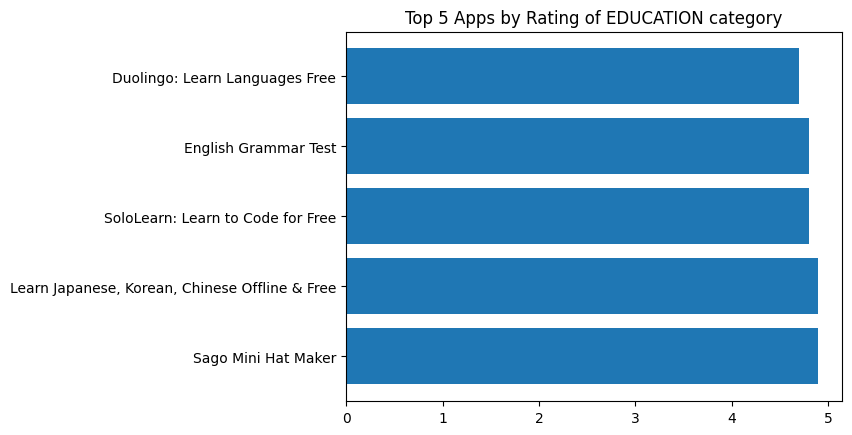

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


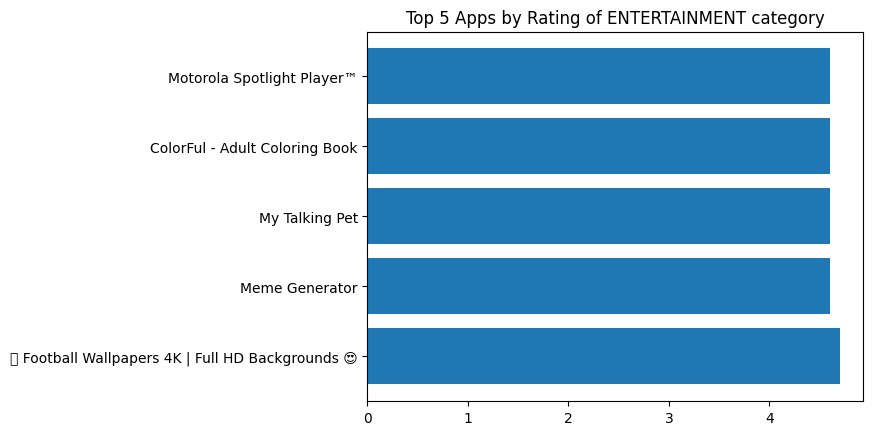

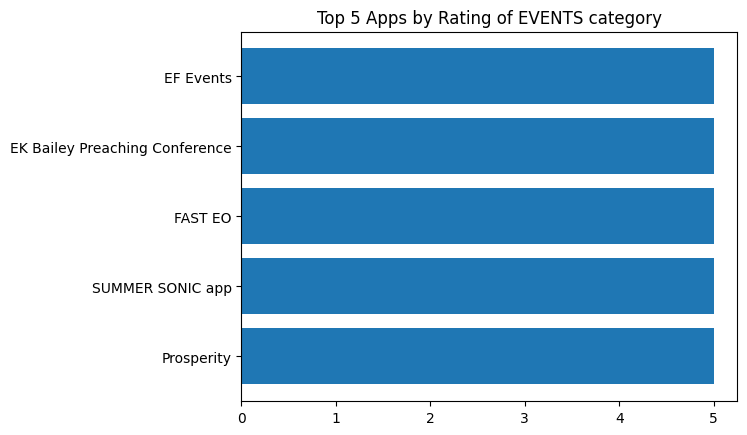

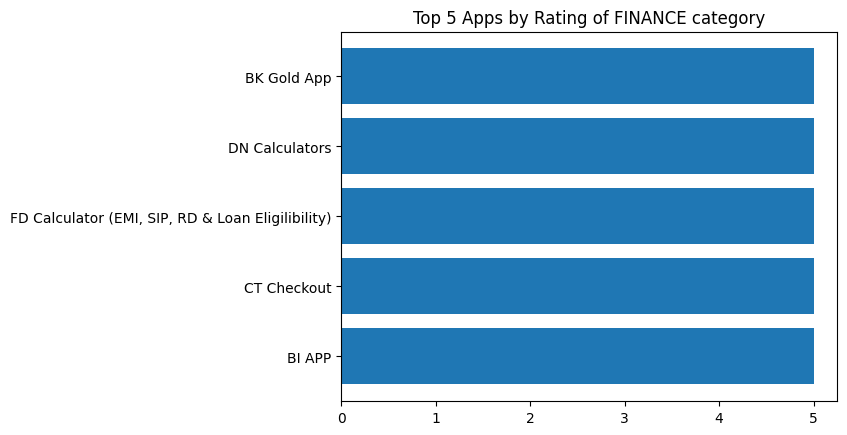

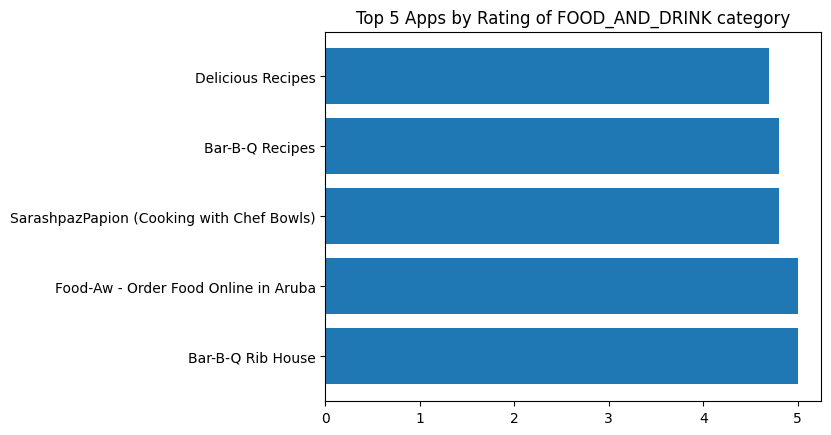

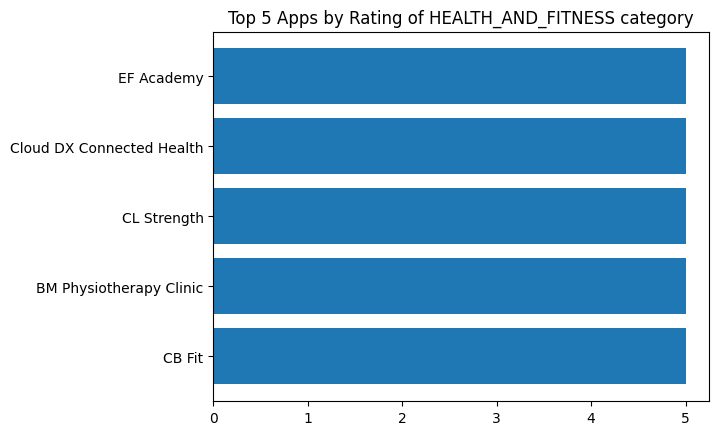

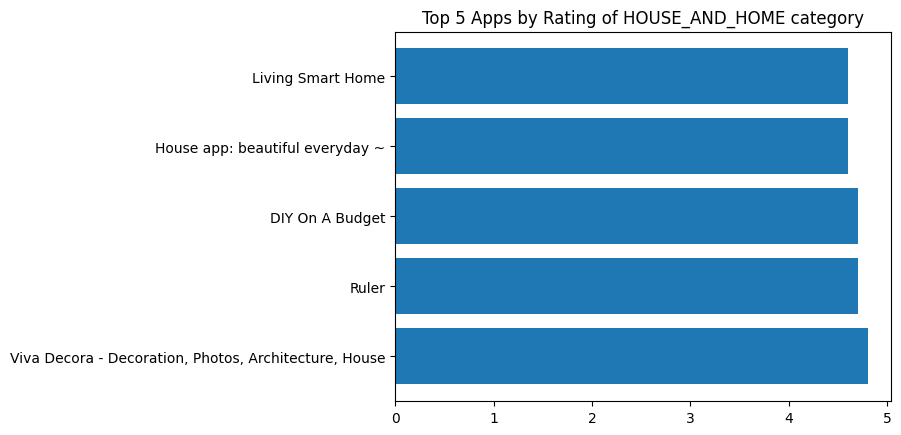

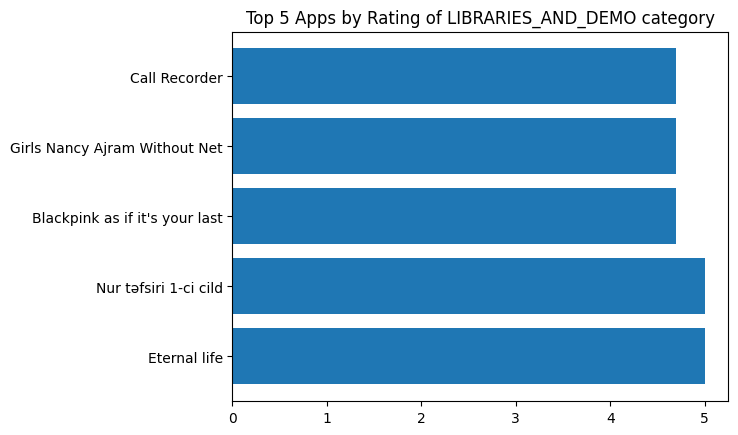

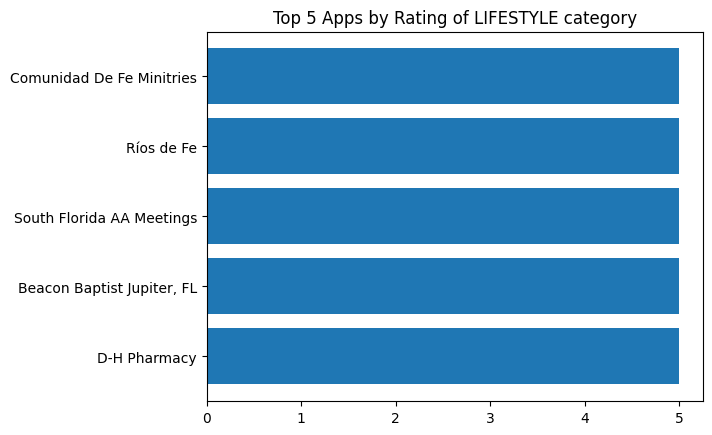

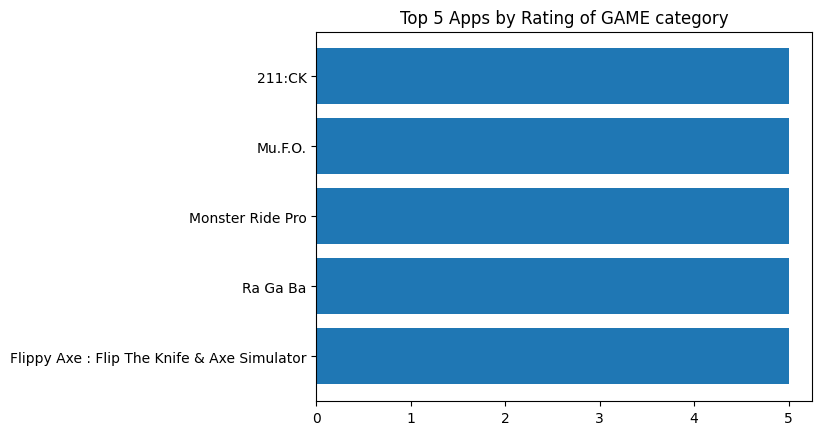

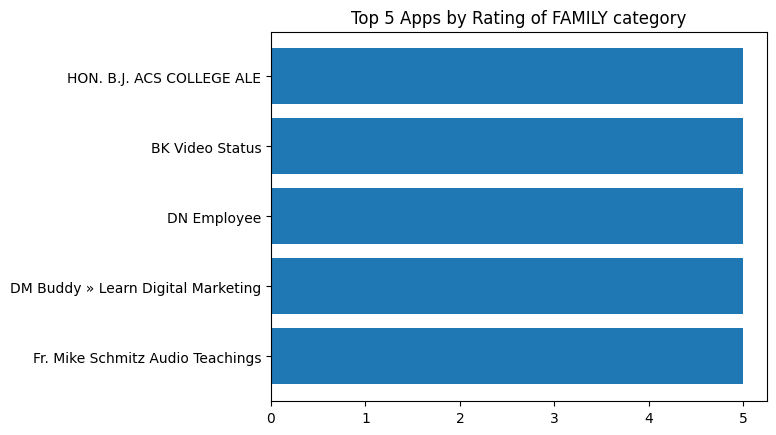

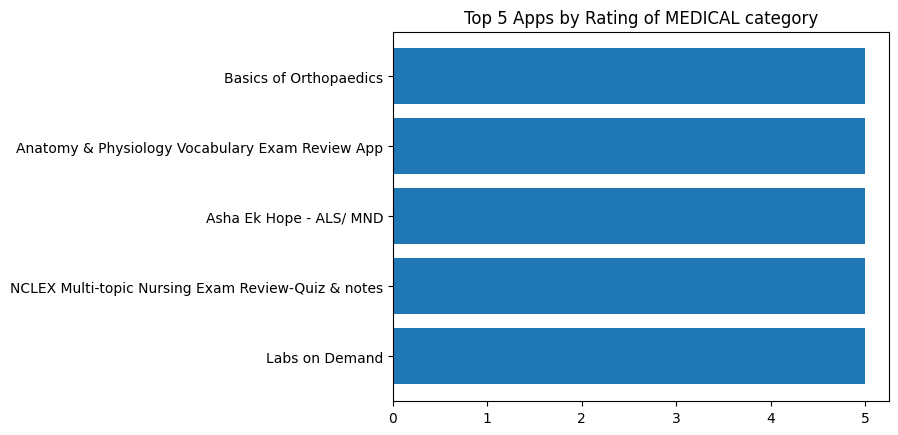

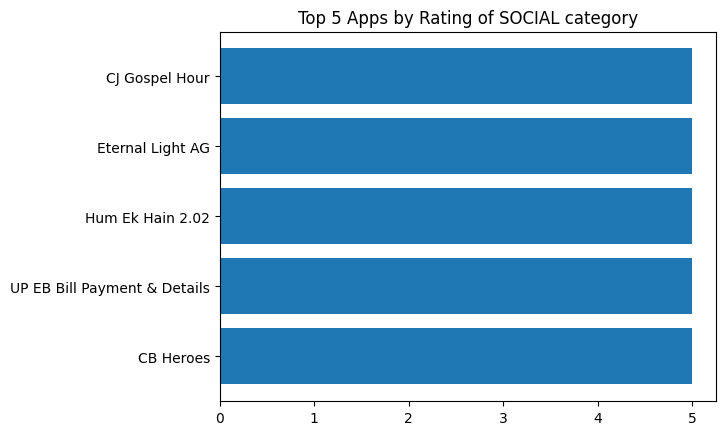

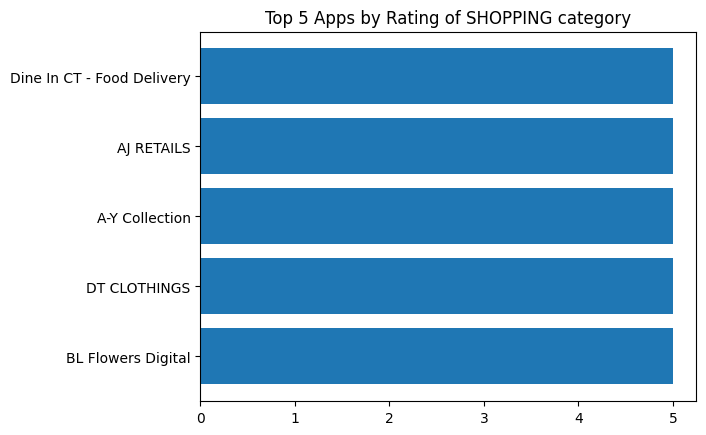

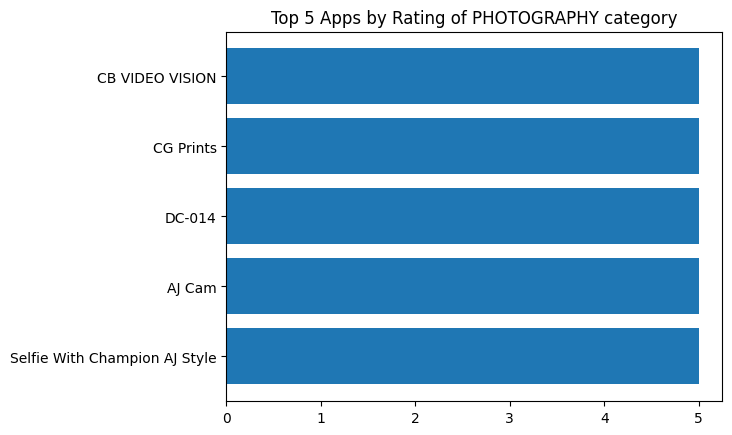

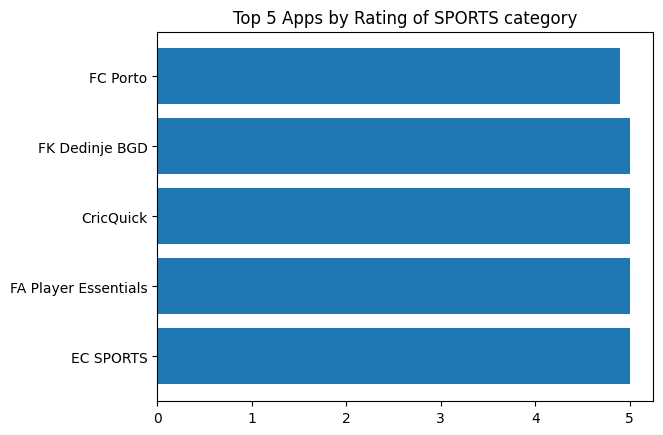

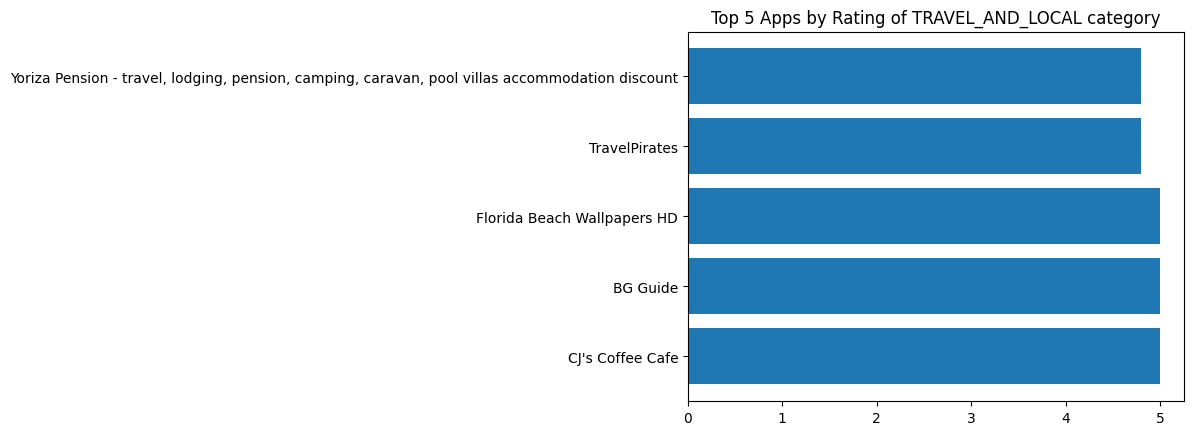

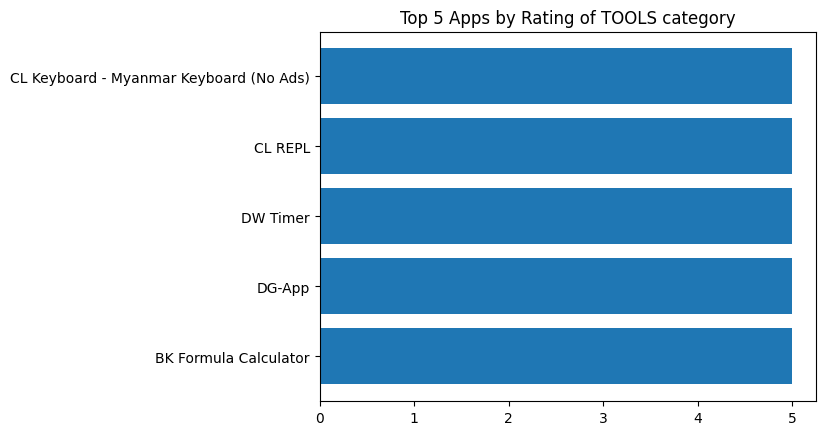

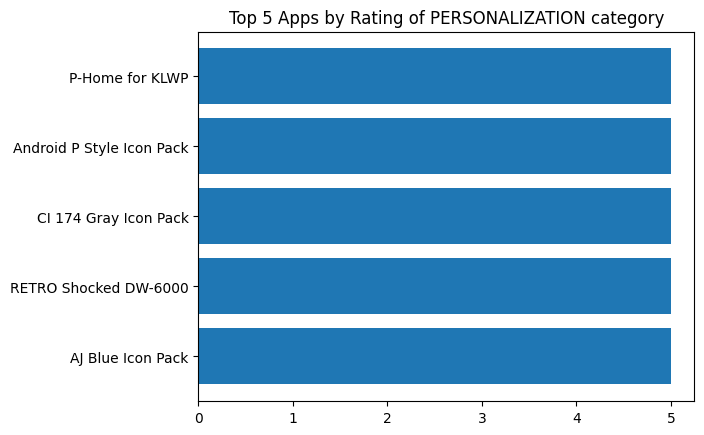

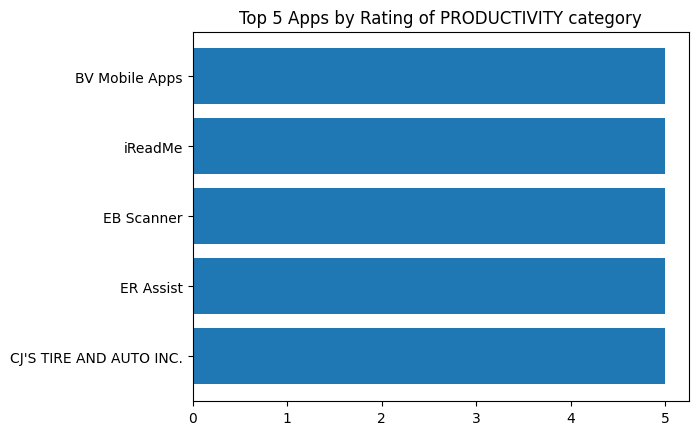

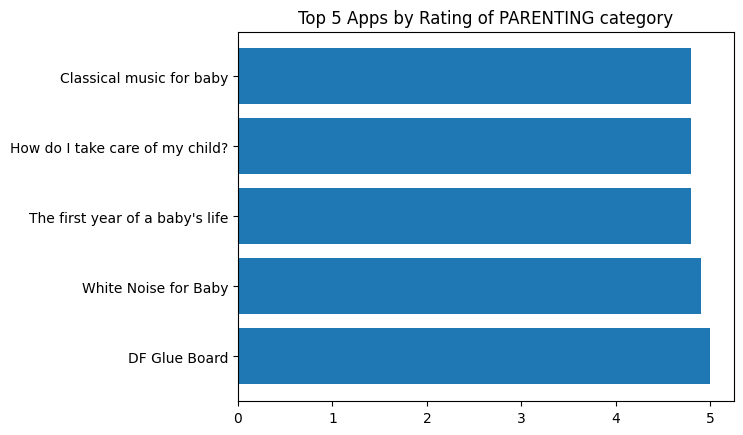

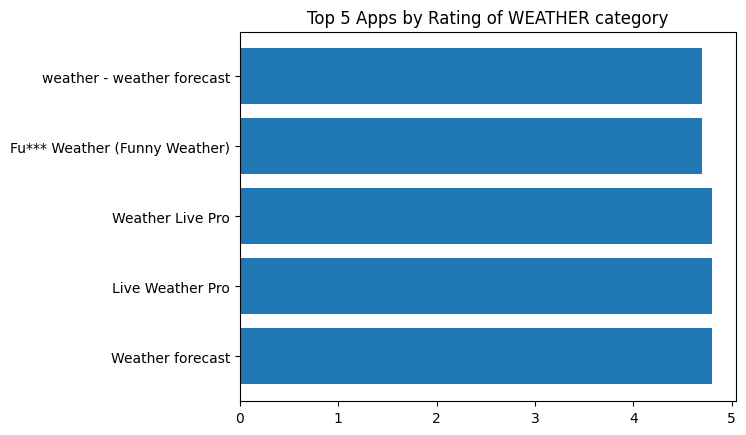

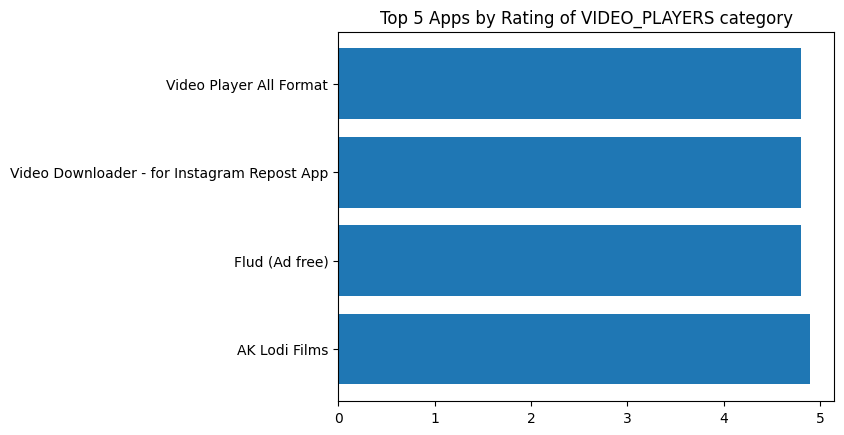

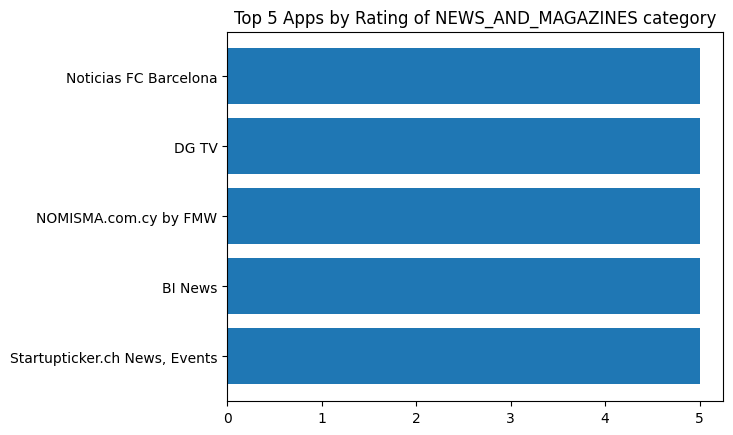

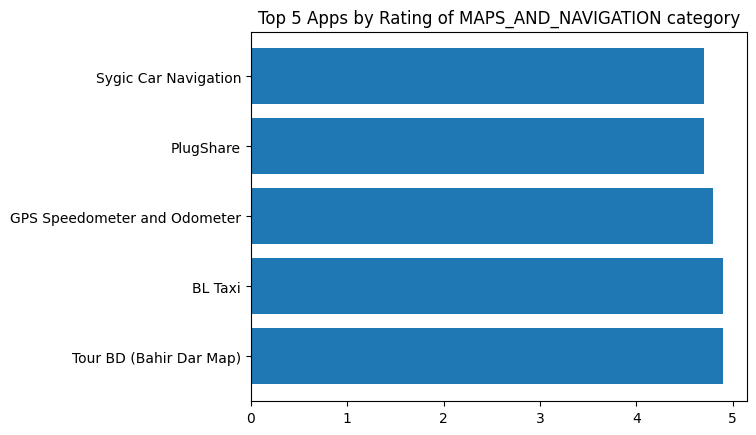

In [185]:
# see with horizontal barplot the top 5 rating applications
unique_categories = df_play_store['Category'].unique()
for category in unique_categories:
    plt.figure()
    plt.title(f'Top 5 Apps by Rating of {category} category')
    category_df = df_play_store[df_play_store['Category'] == category]
    sorted_category_df = category_df.sort_values(by='Rating', ascending=False)
    plt.barh(sorted_category_df["App"].head(), sorted_category_df["Rating"].head())
    plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


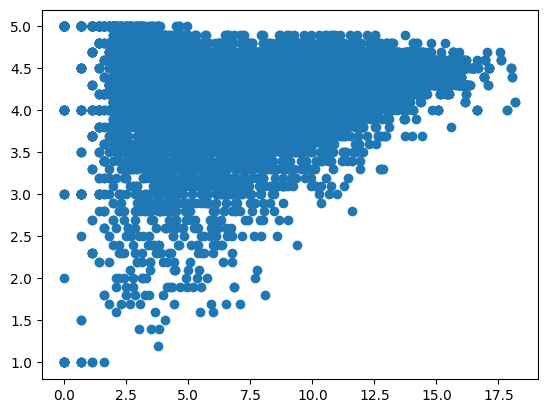

In [190]:
plt.scatter(np.log(df_play_store["Reviews"]), df_play_store["Rating"])
# the more the application has reviewers, the less there are low ratings

In [186]:
df_play_store.corr(numeric_only=True)

,Rating,Reviews,"Price, $"
Rating,1.000000,0.068732,-0.022355
Reviews,0.068732,1.000000,-0.009418
"Price, $",-0.022355,-0.009418,1.000000


<Axes: title={'center': 'Rating'}, xlabel='Type'>

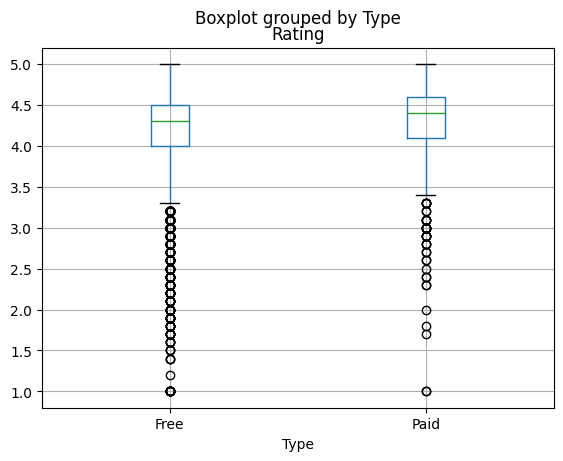

In [187]:
df_play_store.boxplot(column='Rating', by='Type', ax=plt.gca())


In [188]:
# ratings of paid and free applications have about the same median/iqr,
# so the ratings does not depend on application type